In [ ]:
!pip install ipynb

In [1]:
# import dataframe which stores information of the dataset
from ipynb.fs.full.ImageProcessing_VGG import load_data

                                  Id                      Old_Id  \
0  ./People_after1/Ennie/Ennie07.JPG  ./People/Ennie/Ennie07.JPG   
1  ./People_after1/Ennie/Ennie06.JPG  ./People/Ennie/Ennie06.JPG   
2  ./People_after1/Ennie/Ennie10.JPG  ./People/Ennie/Ennie10.JPG   
3  ./People_after1/Ennie/Ennie04.JPG  ./People/Ennie/Ennie04.JPG   
4  ./People_after1/Ennie/Ennie05.JPG  ./People/Ennie/Ennie05.JPG   

      Folder_Name   Image_Name Person_Name  Labels  
0  ./People/Ennie  Ennie07.JPG       Ennie       1  
1  ./People/Ennie  Ennie06.JPG       Ennie       1  
2  ./People/Ennie  Ennie10.JPG       Ennie       1  
3  ./People/Ennie  Ennie04.JPG       Ennie       1  
4  ./People/Ennie  Ennie05.JPG       Ennie       1   

                                     Id                        Old_Id  \
45  ./People_after1/Teresa/Teresa02.JPG  ./People/Teresa/Teresa02.JPG   
46  ./People_after1/Teresa/Teresa03.JPG  ./People/Teresa/Teresa03.JPG   
47  ./People_after1/Teresa/Teresa01.JPG  ./People/Te

In [2]:
#import used libraries
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from keras.models import Sequential, load_model
from sklearn.metrics import accuracy_score, confusion_matrix
from sklearn.preprocessing import OneHotEncoder
import keras
from keras.callbacks import ModelCheckpoint, EarlyStopping
import tensorflow as tf
from keras.applications.vgg16 import VGG16
from keras.models import Model
from keras.preprocessing import image
from keras.layers import Input, Lambda ,Dense ,Flatten, GlobalAveragePooling2D, MaxPooling2D, Conv2D, Dropout
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [3]:
X, Y = load_data()

## Model Defining

In [4]:
#vgg 16 model
vgg16 = VGG16(input_shape= (224,224,3),include_top=False,weights='imagenet')
vgg16.summary()

Model: "vgg16"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 224, 224, 3)]     0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, 224, 224, 64)      1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 224, 224, 64)      36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 112, 112, 64)      0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 112, 112, 128)     73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 112, 112, 128)     147584    
_________________________________________________________________
block2_pool (MaxPooling2D)   (None, 56, 56, 128)       0     

In [5]:
#not train top layers
for layer in vgg16.layers:
    layer.trainable = False

In [6]:
#adding extra layers for our class/images
main_model = vgg16.output
main_model = GlobalAveragePooling2D()(main_model)
main_model = Dense(1024,activation='relu')(main_model)
main_model = Dense(512,activation='relu')(main_model)
main_model = Dense(5,activation='softmax')(main_model)

In [7]:
model = Model(inputs = vgg16.input , outputs = main_model)
model.summary()

Model: "model"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 224, 224, 3)]     0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, 224, 224, 64)      1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 224, 224, 64)      36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 112, 112, 64)      0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 112, 112, 128)     73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 112, 112, 128)     147584    
_________________________________________________________________
block2_pool (MaxPooling2D)   (None, 56, 56, 128)       0     

In [8]:
early_stopping = EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)

## Image Augmentation

In [9]:
X_train, X_valid, Y_train, Y_valid = train_test_split(X, Y, test_size=0.1, random_state = 5)
X_train, X_test, Y_train, Y_test = train_test_split(X_train, Y_train, test_size=0.2, random_state = 5)

In [ ]:
# def image_augmentation(x_train, x_valid, y_train, y_valid):
#     # define data preparation
#     train_datagen = ImageDataGenerator(rescale=1./255,
#                                        rotation_range=15,
#                                        width_shift_range=0.1,
#                                        height_shift_range=0.1,
#                                        shear_range=0.2,
#                                        zoom_range=0.2,
#                                        horizontal_flip=True,
#                                        fill_mode='nearest')
    
#     test_datagen = ImageDataGenerator(rescale=1. / 255)
    
#     training_set= train_datagen.flow(x_train, y_train, batch_size=1)
#     test_set= test_datagen.flow(x_valid, y_valid, batch_size=1)
#     return training_set, test_set

In [ ]:
# training_set, valid_set = image_augmentation(X_train, X_valid, Y_train, Y_valid)

## Model Compiling with different optimizers

Stochastic Gradient Descent

In [10]:
VGG16_SGD = Model(inputs = vgg16.input , outputs = main_model)

In [11]:
opt_SGD = keras.optimizers.SGD(lr=0.01)  
VGG16_SGD.compile(loss="categorical_crossentropy", optimizer=opt_SGD, metrics=["accuracy"]) 

In [12]:
VGG16_SGD_model_checkpoint = ModelCheckpoint('face_detect_VGG16_SGD.h5', verbose=1, save_best_only=True)

Adam

In [15]:
VGG16_Adam = Model(inputs = vgg16.input , outputs = main_model)

In [16]:
opt_Adam = keras.optimizers.Adam(lr=0.01)
VGG16_Adam.compile(loss="categorical_crossentropy", optimizer=opt_Adam, metrics=["accuracy"]) 

In [17]:
VGG16_Adam_model_checkpoint = ModelCheckpoint('face_detect_VGG16_Adam.h5', verbose=1, save_best_only=True)

Adagrad

In [18]:
VGG16_Adagrad = Model(inputs = vgg16.input , outputs = main_model)

In [19]:
opt_Adagrad = keras.optimizers.Adagrad(lr=0.01)
VGG16_Adagrad.compile(loss="categorical_crossentropy", optimizer=opt_Adagrad, metrics=["accuracy"]) 

In [20]:
VGG16_Adagrad_model_checkpoint = ModelCheckpoint('face_detect_VGG16_Adagrad.h5', verbose=1, save_best_only=True)

Adadelta

In [21]:
VGG16_Adadelta = Model(inputs = vgg16.input , outputs = main_model)

In [22]:
opt_Adadelta = keras.optimizers.Adadelta(lr=0.01)
VGG16_Adadelta.compile(loss="categorical_crossentropy", optimizer=opt_Adadelta, metrics=["accuracy"]) 

In [23]:
VGG16_Adadelta_model_checkpoint = ModelCheckpoint('face_detect_VGG16_Adadelta.h5', verbose=1, save_best_only=True)

RMSProp

In [24]:
VGG16_RMSProp = Model(inputs = vgg16.input , outputs = main_model)

In [25]:
opt_RMSProp = keras.optimizers.RMSprop(learning_rate=0.01, decay=1e-6)
VGG16_RMSProp.compile(loss="categorical_crossentropy", optimizer=opt_RMSProp, metrics=["accuracy"]) 

In [67]:
VGG16_RMSProp_model_checkpoint = ModelCheckpoint('face_detect_VGG16_RMSProp.h5', verbose=1, save_best_only=True)

## Model Training

In [13]:
epochs=50
batch_size = 1

Stochastic Gradient Descent

In [14]:
#fit the model
history_SGD = None
history_SGD = VGG16_SGD.fit(X_train, Y_train,
                            batch_size = batch_size,
                            epochs = epochs,
                            callbacks=[VGG16_SGD_model_checkpoint],
                            validation_data=(X_valid, Y_valid))

Epoch 1/50
36/36 [==============================] - 14s 363ms/step - loss: 1.8908 - accuracy: 0.3108 - val_loss: 1.5426 - val_accuracy: 0.2000

Epoch 00001: val_loss improved from inf to 1.54256, saving model to face_detect_VGG16_SGD.h5
Epoch 2/50
36/36 [==============================] - 12s 341ms/step - loss: 1.7039 - accuracy: 0.1176 - val_loss: 1.7539 - val_accuracy: 0.0000e+00

Epoch 00002: val_loss did not improve from 1.54256
Epoch 3/50
36/36 [==============================] - 12s 322ms/step - loss: 1.5649 - accuracy: 0.3572 - val_loss: 1.7455 - val_accuracy: 0.2000

Epoch 00003: val_loss did not improve from 1.54256
Epoch 4/50
36/36 [==============================] - 12s 322ms/step - loss: 1.6066 - accuracy: 0.3119 - val_loss: 1.7264 - val_accuracy: 0.2000

Epoch 00004: val_loss did not improve from 1.54256
Epoch 5/50
36/36 [==============================] - 11s 313ms/step - loss: 1.4337 - accuracy: 0.2201 - val_loss: 1.7882 - val_accuracy: 0.0000e+00

Epoch 00005: val_loss did 

36/36 [==============================] - 10s 291ms/step - loss: 0.5643 - accuracy: 0.8091 - val_loss: 1.6736 - val_accuracy: 0.4000

Epoch 00042: val_loss did not improve from 1.34156
Epoch 43/50
36/36 [==============================] - 10s 290ms/step - loss: 0.7852 - accuracy: 0.6773 - val_loss: 3.0358 - val_accuracy: 0.2000

Epoch 00043: val_loss did not improve from 1.34156
Epoch 44/50
36/36 [==============================] - 11s 309ms/step - loss: 0.4405 - accuracy: 0.8996 - val_loss: 1.7391 - val_accuracy: 0.2000

Epoch 00044: val_loss did not improve from 1.34156
Epoch 45/50
36/36 [==============================] - 10s 286ms/step - loss: 0.3995 - accuracy: 0.9400 - val_loss: 2.0288 - val_accuracy: 0.0000e+00

Epoch 00045: val_loss did not improve from 1.34156
Epoch 46/50
36/36 [==============================] - 10s 293ms/step - loss: 0.5390 - accuracy: 0.7470 - val_loss: 3.3898 - val_accuracy: 0.4000

Epoch 00046: val_loss did not improve from 1.34156
Epoch 47/50
36/36 [=========

Adam

In [27]:
#fit the model
history_Adam = None
history_Adam = VGG16_SGD.fit(X_train, Y_train,
                             batch_size = batch_size,
                             epochs = epochs,
                             callbacks=[VGG16_Adam_model_checkpoint],
                             validation_data=(X_valid, Y_valid))

Epoch 1/50
36/36 [==============================] - 13s 353ms/step - loss: 0.5203 - accuracy: 0.8333 - val_loss: 2.6409 - val_accuracy: 0.0000e+00

Epoch 00001: val_loss improved from inf to 2.64086, saving model to face_detect_VGG16_Adam.h5
Epoch 2/50
36/36 [==============================] - 11s 307ms/step - loss: 0.4772 - accuracy: 0.8056 - val_loss: 2.2933 - val_accuracy: 0.4000

Epoch 00002: val_loss improved from 2.64086 to 2.29332, saving model to face_detect_VGG16_Adam.h5
Epoch 3/50
36/36 [==============================] - 13s 376ms/step - loss: 0.6521 - accuracy: 0.7500 - val_loss: 2.0173 - val_accuracy: 0.2000

Epoch 00003: val_loss improved from 2.29332 to 2.01729, saving model to face_detect_VGG16_Adam.h5
Epoch 4/50
36/36 [==============================] - 11s 317ms/step - loss: 0.4709 - accuracy: 0.7500 - val_loss: 1.7444 - val_accuracy: 0.0000e+00

Epoch 00004: val_loss improved from 2.01729 to 1.74441, saving model to face_detect_VGG16_Adam.h5
Epoch 5/50
36/36 [==========

Adagrad

In [28]:
#fit the model
history_Adagrad = None
history_Adagrad = VGG16_SGD.fit(X_train, Y_train,
                                batch_size = batch_size,
                                epochs = epochs,
                                callbacks=[VGG16_Adagrad_model_checkpoint],
                                validation_data=(X_valid, Y_valid))

Epoch 1/50
36/36 [==============================] - 10s 285ms/step - loss: 0.1014 - accuracy: 0.9444 - val_loss: 2.0244 - val_accuracy: 0.4000

Epoch 00001: val_loss improved from inf to 2.02435, saving model to face_detect_VGG16_Adagrad.h5
Epoch 2/50
36/36 [==============================] - 11s 312ms/step - loss: 0.1322 - accuracy: 0.9722 - val_loss: 3.5749 - val_accuracy: 0.6000

Epoch 00002: val_loss did not improve from 2.02435
Epoch 3/50
36/36 [==============================] - 14s 398ms/step - loss: 0.2598 - accuracy: 0.9167 - val_loss: 2.6890 - val_accuracy: 0.6000

Epoch 00003: val_loss did not improve from 2.02435
Epoch 4/50
36/36 [==============================] - 11s 306ms/step - loss: 0.0862 - accuracy: 1.0000 - val_loss: 2.3502 - val_accuracy: 0.6000

Epoch 00004: val_loss did not improve from 2.02435
Epoch 5/50
36/36 [==============================] - 10s 291ms/step - loss: 0.0538 - accuracy: 1.0000 - val_loss: 2.4485 - val_accuracy: 0.2000

Epoch 00005: val_loss did not 

36/36 [==============================] - 10s 266ms/step - loss: 0.0179 - accuracy: 1.0000 - val_loss: 2.6010 - val_accuracy: 0.6000

Epoch 00042: val_loss did not improve from 1.81433
Epoch 43/50
36/36 [==============================] - 10s 267ms/step - loss: 0.0175 - accuracy: 1.0000 - val_loss: 2.5458 - val_accuracy: 0.6000

Epoch 00043: val_loss did not improve from 1.81433
Epoch 44/50
36/36 [==============================] - 10s 267ms/step - loss: 0.0185 - accuracy: 1.0000 - val_loss: 2.7140 - val_accuracy: 0.6000

Epoch 00044: val_loss did not improve from 1.81433
Epoch 45/50
36/36 [==============================] - 10s 275ms/step - loss: 0.4611 - accuracy: 0.8056 - val_loss: 2.8343 - val_accuracy: 0.4000

Epoch 00045: val_loss did not improve from 1.81433
Epoch 46/50
36/36 [==============================] - 11s 316ms/step - loss: 0.0425 - accuracy: 1.0000 - val_loss: 2.6175 - val_accuracy: 0.4000

Epoch 00046: val_loss did not improve from 1.81433
Epoch 47/50
36/36 [=============

Adadelta

In [29]:
#fit the model
history_Adadelta = None
history_Adadelta = VGG16_SGD.fit(X_train, Y_train,
                                 batch_size = batch_size,
                                 epochs = epochs,
                                 callbacks=[VGG16_Adadelta_model_checkpoint],
                                 validation_data=(X_valid, Y_valid))

Epoch 1/50
36/36 [==============================] - 11s 317ms/step - loss: 0.0148 - accuracy: 1.0000 - val_loss: 2.5469 - val_accuracy: 0.6000

Epoch 00001: val_loss improved from inf to 2.54692, saving model to face_detect_VGG16_Adadelta.h5
Epoch 2/50
36/36 [==============================] - 11s 296ms/step - loss: 0.0155 - accuracy: 1.0000 - val_loss: 2.6720 - val_accuracy: 0.6000

Epoch 00002: val_loss did not improve from 2.54692
Epoch 3/50
36/36 [==============================] - 10s 276ms/step - loss: 0.0129 - accuracy: 1.0000 - val_loss: 2.6788 - val_accuracy: 0.6000

Epoch 00003: val_loss did not improve from 2.54692
Epoch 4/50
36/36 [==============================] - 10s 287ms/step - loss: 0.0142 - accuracy: 1.0000 - val_loss: 2.6662 - val_accuracy: 0.6000

Epoch 00004: val_loss did not improve from 2.54692
Epoch 5/50
36/36 [==============================] - 11s 318ms/step - loss: 0.0134 - accuracy: 1.0000 - val_loss: 2.7426 - val_accuracy: 0.4000

Epoch 00005: val_loss did not


Epoch 00042: val_loss did not improve from 2.54692
Epoch 43/50
36/36 [==============================] - 10s 289ms/step - loss: 0.0059 - accuracy: 1.0000 - val_loss: 2.7936 - val_accuracy: 0.6000

Epoch 00043: val_loss did not improve from 2.54692
Epoch 44/50
36/36 [==============================] - 11s 305ms/step - loss: 0.0056 - accuracy: 1.0000 - val_loss: 2.7772 - val_accuracy: 0.6000

Epoch 00044: val_loss did not improve from 2.54692
Epoch 45/50
36/36 [==============================] - 11s 296ms/step - loss: 0.0053 - accuracy: 1.0000 - val_loss: 2.7662 - val_accuracy: 0.6000

Epoch 00045: val_loss did not improve from 2.54692
Epoch 46/50
36/36 [==============================] - 10s 288ms/step - loss: 0.0051 - accuracy: 1.0000 - val_loss: 2.7180 - val_accuracy: 0.6000

Epoch 00046: val_loss did not improve from 2.54692
Epoch 47/50
36/36 [==============================] - 11s 305ms/step - loss: 0.0050 - accuracy: 1.0000 - val_loss: 2.7443 - val_accuracy: 0.6000

Epoch 00047: val_lo

RMSProp

In [68]:
#fit the model
history_RMSProp = None
history_RMSProp = VGG16_SGD.fit(X_train, Y_train,
                                batch_size = batch_size,
                                epochs = epochs,
                                callbacks=[VGG16_RMSProp_model_checkpoint],
                                validation_data=(X_valid, Y_valid))

Epoch 1/50
36/36 [==============================] - 14s 373ms/step - loss: 1.0707 - accuracy: 0.6389 - val_loss: 1.8766 - val_accuracy: 0.0000e+00

Epoch 00001: val_loss improved from inf to 1.87664, saving model to face_detect_VGG16_RMSProp.h5
Epoch 2/50
36/36 [==============================] - 12s 343ms/step - loss: 1.0958 - accuracy: 0.5278 - val_loss: 1.7625 - val_accuracy: 0.0000e+00

Epoch 00002: val_loss improved from 1.87664 to 1.76247, saving model to face_detect_VGG16_RMSProp.h5
Epoch 3/50
36/36 [==============================] - 13s 356ms/step - loss: 1.0068 - accuracy: 0.6389 - val_loss: 1.6287 - val_accuracy: 0.4000

Epoch 00003: val_loss improved from 1.76247 to 1.62872, saving model to face_detect_VGG16_RMSProp.h5
Epoch 4/50
36/36 [==============================] - 11s 297ms/step - loss: 0.8652 - accuracy: 0.6389 - val_loss: 1.6495 - val_accuracy: 0.6000

Epoch 00004: val_loss did not improve from 1.62872
Epoch 5/50
36/36 [==============================] - 10s 268ms/step

36/36 [==============================] - 10s 273ms/step - loss: 0.5657 - accuracy: 0.7222 - val_loss: 1.5627 - val_accuracy: 0.6000

Epoch 00037: val_loss did not improve from 1.32706
Epoch 38/50
36/36 [==============================] - 10s 270ms/step - loss: 0.4300 - accuracy: 0.8333 - val_loss: 2.0727 - val_accuracy: 0.2000

Epoch 00038: val_loss did not improve from 1.32706
Epoch 39/50
36/36 [==============================] - 10s 270ms/step - loss: 0.4998 - accuracy: 0.7778 - val_loss: 1.6264 - val_accuracy: 0.4000

Epoch 00039: val_loss did not improve from 1.32706
Epoch 40/50
36/36 [==============================] - 10s 271ms/step - loss: 0.4030 - accuracy: 0.8333 - val_loss: 1.4754 - val_accuracy: 0.2000

Epoch 00040: val_loss did not improve from 1.32706
Epoch 41/50
36/36 [==============================] - 10s 270ms/step - loss: 0.6207 - accuracy: 0.6944 - val_loss: 1.4749 - val_accuracy: 0.4000

Epoch 00041: val_loss did not improve from 1.32706
Epoch 42/50
36/36 [=============

## Model Evaluation

Stochastic Gradient Descent

In [49]:
VGG16_SGD = load_model('face_detect_VGG16_SGD.h5')

In [50]:
# Score trained model.
VGG16_SGD.evaluate(X_test, Y_test)

1/1 [==============================] - 2s 2s/step - loss: 1.3180 - accuracy: 0.6667


[1.3179986476898193, 0.6666666865348816]

In [62]:
# Score trained model.
VGG16_SGD.evaluate(X_valid, Y_valid)

1/1 [==============================] - 1s 1s/step - loss: 1.3416 - accuracy: 0.4000


[1.341557502746582, 0.4000000059604645]

In [51]:
# make predictions.
pred_SGD = VGG16_SGD.predict(X_test)

Adam

In [52]:
VGG16_Adam = load_model('face_detect_VGG16_Adam.h5')

In [53]:
# Score trained model.
VGG16_Adam.evaluate(X_test, Y_test)

1/1 [==============================] - 3s 3s/step - loss: 1.4872 - accuracy: 0.3333


[1.4871716499328613, 0.3333333432674408]

In [64]:
# Score trained model.
VGG16_Adam.evaluate(X_valid, Y_valid)

1/1 [==============================] - 1s 1s/step - loss: 1.4418 - accuracy: 0.4000


[1.4418236017227173, 0.4000000059604645]

In [54]:
# make predictions.
pred_Adam = VGG16_Adam.predict(X_test)

Adagrad

In [55]:
VGG16_Adagrad = load_model('face_detect_VGG16_Adagrad.h5')

In [56]:
# Score trained model.
VGG16_Adagrad.evaluate(X_test, Y_test)

1/1 [==============================] - 3s 3s/step - loss: 1.7762 - accuracy: 0.6667


[1.7762025594711304, 0.6666666865348816]

In [65]:
# Score trained model.
VGG16_Adagrad.evaluate(X_valid, Y_valid)

1/1 [==============================] - 2s 2s/step - loss: 1.8143 - accuracy: 0.6000


[1.814327597618103, 0.6000000238418579]

In [57]:
# make predictions.
pred_Adagrad = VGG16_Adagrad.predict(X_test)

Adadelta

In [58]:
VGG16_Adadelta = load_model('face_detect_VGG16_Adadelta.h5')

In [59]:
# Score trained model.
VGG16_Adadelta.evaluate(X_test, Y_test)

1/1 [==============================] - 3s 3s/step - loss: 2.0885 - accuracy: 0.6667


[2.088503837585449, 0.6666666865348816]

In [66]:
# Score trained model.
VGG16_Adadelta.evaluate(X_valid, Y_valid)

1/1 [==============================] - 1s 1s/step - loss: 2.5469 - accuracy: 0.6000


[2.546923875808716, 0.6000000238418579]

In [60]:
# make predictions.
pred_Adadelta = VGG16_Adadelta.predict(X_test)

RMSProp

In [78]:
VGG16_RMSProp = load_model('face_detect_VGG16_RMSProp.h5')

In [79]:
# Score trained model.
VGG16_RMSProp.evaluate(X_test, Y_test)

1/1 [==============================] - 2s 2s/step - loss: 0.8650 - accuracy: 0.5556


[0.865013837814331, 0.5555555820465088]

In [80]:
# Score trained model.
VGG16_RMSProp.evaluate(X_valid, Y_valid)

1/1 [==============================] - 1s 1s/step - loss: 0.9849 - accuracy: 0.8000


[0.9849337339401245, 0.800000011920929]

In [81]:
# make predictions.
pred_RMSProp = VGG16_RMSProp.predict(X_test)

## Model Evaluation - model accuracy/loss curves

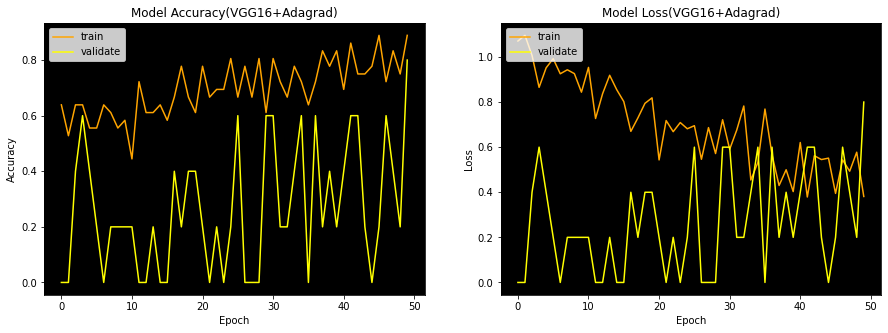

In [73]:
def plotmodelhistory(history): 
    fig, axs = plt.subplots(1,2,figsize=(15,5)) 
    # summarize history for accuracy
    axs[0].plot(history.history['accuracy'], color="orange")
    axs[0].plot(history.history['val_accuracy'], color="yellow") 
    axs[0].set_title('Model Accuracy(VGG16+Adagrad)')
    axs[0].set_ylabel('Accuracy') 
    axs[0].set_xlabel('Epoch')
    axs[0].set_facecolor('xkcd:black')
    axs[0].legend(['train', 'validate'], loc='upper left')
    # summarize history for loss
    axs[1].plot(history.history['loss'], color="orange") 
    axs[1].plot(history.history['val_accuracy'], color="yellow") 
    axs[1].set_title('Model Loss(VGG16+Adagrad)')
    axs[1].set_ylabel('Loss') 
    axs[1].set_xlabel('Epoch')
    axs[1].set_facecolor('xkcd:black')
    axs[1].legend(['train', 'validate'], loc='upper left')
    plt.show()

plotmodelhistory(history_RMSProp)

## Model Evaluation - confusion matrix

In [43]:
def heatmap(data, row_labels, col_labels, ax=None, cbar_kw={}, cbarlabel="", **kwargs):
    """
    Create a heatmap from a numpy array and two lists of labels.
    """
    # Plot the heatmap
    im = ax.imshow(data, **kwargs)

    # Create colorbar
    cbar = ax.figure.colorbar(im, ax=ax, **cbar_kw)
    cbar.ax.set_ylabel(cbarlabel, rotation=-90, va="bottom")

    # Let the horizontal axes labeling appear on top.
    ax.tick_params(top=True, bottom=False, labeltop=True, labelbottom=False)
    # Show all ticks
    ax.set_xticks(np.arange(data.shape[1]))
    ax.set_yticks(np.arange(data.shape[0]))
    # Label ticks with the respective list entries.
    ax.set_xticklabels(col_labels)
    ax.set_yticklabels(row_labels)
    
    ax.set_xlabel('Predicted Label') 
    ax.set_ylabel('True Label')
    
    return im, cbar

def annotate_heatmap(im, data=None, fmt="d", threshold=None):
    """
    A function to annotate a heatmap.
    """
    # Change the text's color depending on the data.
    texts = []
    for i in range(data.shape[0]):
        for j in range(data.shape[1]):
            text = im.axes.text(j, i, format(data[i, j], fmt), horizontalalignment="center",
                                 color="white" if data[i, j] > thresh else "black")
            texts.append(text)

    return texts

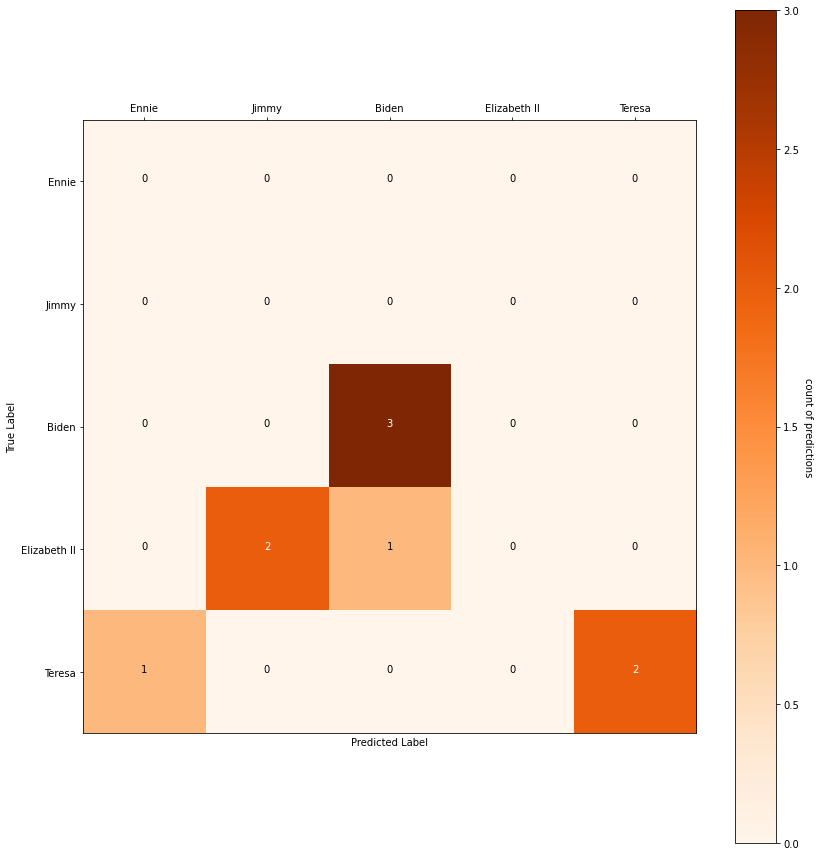

In [82]:
labels = ['Ennie','Jimmy','Biden','Elizabeth II','Teresa']

# Convert predictions classes to one hot vectors 
Y_pred_classes = np.argmax(pred_RMSProp, axis=1) 
# Convert validation observations to one hot vectors
Y_true = np.argmax(Y_test, axis=1)
# Errors are difference between predicted labels and true labels
errors = (Y_pred_classes - Y_true != 0)

Y_pred_classes_errors = Y_pred_classes[errors]
Y_pred_errors = pred_RMSProp[errors]
Y_true_errors = Y_true[errors]
X_valid_errors = X_test[errors]

cm = confusion_matrix(Y_true, Y_pred_classes) 
thresh = cm.max() / 2.

fig, ax = plt.subplots(figsize=(12,12))
im, cbar = heatmap(cm, labels, labels, ax=ax, cmap=plt.cm.Oranges, cbarlabel="count of predictions")
texts = annotate_heatmap(im, data=cm, threshold=thresh)

fig.tight_layout()
plt.show()